In [28]:
import sys
import tqdm
import pandas as pd
import numpy as np

sys.path.append("..")
from util import load_base_data

import neurokit2 as nk

SAMPLING_RATE = 300

In [2]:
X_train, y_train, X_test = load_base_data()

In [25]:
def make_signals(ecg):
    signals, info = nk.ecg_process(ecg_signal=ecg, sampling_rate=SAMPLING_RATE)
    nk.ecg_plot(signals, info)
    return signals, info

In [36]:
def make_features(ecg):
    signals, info = make_signals(ecg)
    features = nk.ecg_intervalrelated(signals, sampling_rate=SAMPLING_RATE)
    return features

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:101: NeuroKitWarning: There are 1485 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:153: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


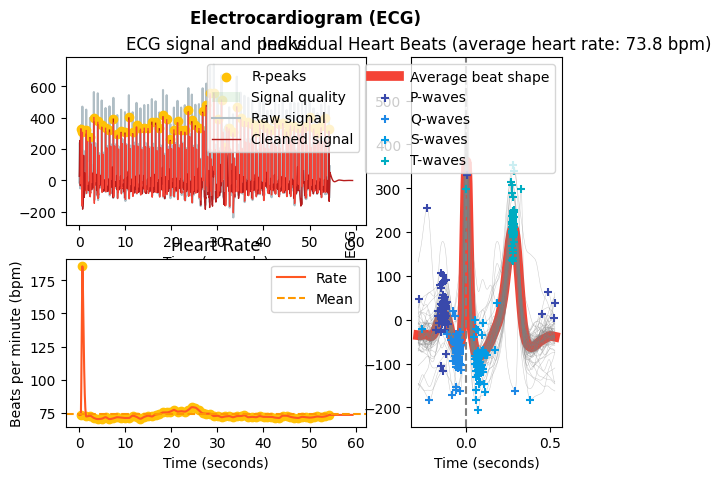

In [38]:
ecg_features = make_features(X_train.iloc[0])

# Bio Process

In [31]:
preprocessed, info = nk.bio_process(ecg=X_train.iloc[0], sampling_rate=SAMPLING_RATE)
results = nk.bio_analyze(preprocessed, sampling_rate=SAMPLING_RATE)

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:101: NeuroKitWarning: There are 1485 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:153: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


In [32]:
results

ECG_Rate_Mean             HRV_MeanNN               HRV_SDNN HRV_SDANN1  \
0     73.815985  [[815.8585858585858]]  [[65.38266218878302]]    [[nan]]   

  HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   

               HRV_RMSSD  ...              HRV_SampEn             HRV_ShanEn  \
0  [[63.71142204617081]]  ...  [[0.4525695772956377]]  [[4.141016711134489]]   

               HRV_FuzzyEn                 HRV_MSEn               HRV_CMSEn  \
0  [[0.38566264652850274]]  [[0.21603864749890622]]  [[0.3809198942913523]]   

                HRV_RCMSEn                  HRV_CD                 HRV_HFD  \
0  [[0.35528471260811445]]  [[0.7900848196990945]]  [[1.7042804985314337]]   

                  HRV_KFD                  HRV_LZC  
0  [[1.1947648984005386]]  [[0.45790864540594345]]  

[1 rows x 83 columns]

# HRV Indices
Already contained in the above analysis.

In [40]:
def make_hrv(ecg):
    peaks, info = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
    hrv_indices = nk.hrv(peaks, sampling_rate=SAMPLING_RATE, show=True)
    return hrv_indices

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


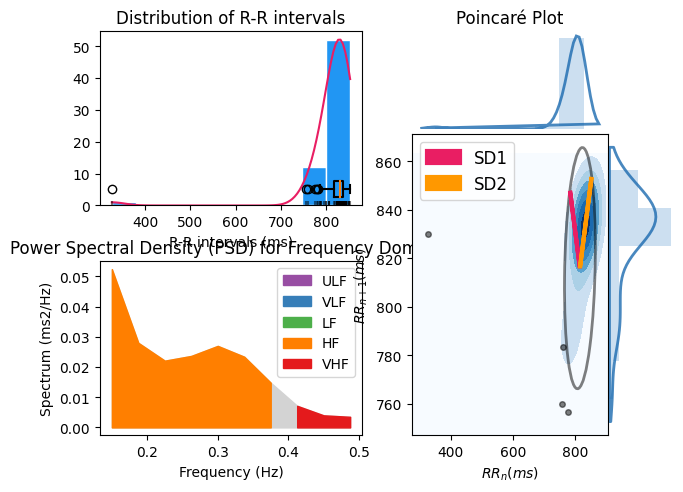

In [41]:
hrv_indices = make_hrv(X_train.iloc[0])

In [46]:
hrv_indices

HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  \
0  815.897436  65.446568         NaN         NaN         NaN         NaN   

   HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD   HRV_SDSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN  63.654613  63.666257  ...    0.374693    4.099141   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn   HRV_CD   HRV_HFD   HRV_KFD  \
0     0.364332  0.207445   0.375777    0.355069  0.77074  1.689945  1.176653   

    HRV_LZC  
0  0.463259  

[1 rows x 82 columns]

In [49]:
# check if all the colums of hrv_indeces are already contained in the results
for col in hrv_indices.columns:
    if col not in results.columns:
        print(col)

# Generate the features

In [76]:
def make_features(ecg):
    preprocessed, info = nk.bio_process(ecg=ecg, sampling_rate=SAMPLING_RATE)
    results = nk.bio_analyze(preprocessed, sampling_rate=SAMPLING_RATE)
    return results


def make_features_from_df(df):
    # features = df.apply(make_features, axis=0)
    feature_shape = make_features(df.iloc[0]).shape
    col_names = make_features(df.iloc[0]).columns
    print(f"Feature shape: {feature_shape}")
    not_features_row = 0
    for i in tqdm.tqdm(range(len(df))):
        try:
            features = make_features(df.iloc[i])
        except:
            features = pd.DataFrame(np.zeros(feature_shape), columns=col_names)
            not_features_row += 1

        if i == 0:
            features_df = features
        else:
            features_df = pd.concat([features_df, features], axis=0)

    features_df = features_df.reset_index(drop=True)
    features_df.index.name = "id"

    print("********** FINISHED ********** \n\n")
    print(f"Could not extract features from {not_features_row} rows")

    return features_df

In [78]:
features_X_train = make_features_from_df(X_train)

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:69: NeuroKitWarning: There are 1485 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/complexity/entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:69: NeuroKitWarning: There are 1485 missing data points in your signal. Filli

Feature shape: (1, 78)


  0%|          | 0/5117 [00:00<?, ?it/s]/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:69: NeuroKitWarning: There are 1485 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/complexity/entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
  0%|          | 1/5117 [00:00<28:55,  2.95it/s]/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ec

********** FINISHED ********** 


Could not extract features from 112 rows
      ECG_Rate_Mean  HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  \
id                                                                    
0         73.815985  815.858586   65.382662         NaN         NaN   
1         72.686821  788.380952   44.024439         NaN         NaN   
2         68.765001  900.689655   35.916341         NaN         NaN   
3        130.770072  383.468468   49.155545         NaN         NaN   
4         99.062557  612.222222   54.827553         NaN         NaN   
...             ...         ...         ...         ...         ...   
5112      73.704226  718.095238  201.843095         NaN         NaN   
5113      67.672627  864.623656   14.315943         NaN         NaN   
5114      75.197535  788.857143   95.270317         NaN         NaN   
5115      70.511976  848.333333   28.461129         NaN         NaN   
5116     101.300420  591.136364   36.471951         NaN         NaN   

 

In [81]:
features_X_train

ECG_Rate_Mean  HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  \
id                                                                    
0         73.815985  815.858586   65.382662         NaN         NaN   
1         72.686821  788.380952   44.024439         NaN         NaN   
2         68.765001  900.689655   35.916341         NaN         NaN   
3        130.770072  383.468468   49.155545         NaN         NaN   
4         99.062557  612.222222   54.827553         NaN         NaN   
...             ...         ...         ...         ...         ...   
5112      73.704226  718.095238  201.843095         NaN         NaN   
5113      67.672627  864.623656   14.315943         NaN         NaN   
5114      75.197535  788.857143   95.270317         NaN         NaN   
5115      70.511976  848.333333   28.461129         NaN         NaN   
5116     101.300420  591.136364   36.471951         NaN         NaN   

      HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...  \
id                                                                ...   
0            NaN         NaN         NaN         NaN   63.711422  ...   
1            NaN         NaN         NaN         NaN   26.228010  ...   
2            NaN         NaN         NaN         NaN   26.532400  ...   
3            NaN         NaN         NaN         NaN   53.359012  ...   
4            NaN         NaN         NaN         NaN   38.537008  ...   
...          ...         ...         ...         ...         ...  ...   
5112         NaN         NaN         NaN         NaN  212.320512  ...   
5113         NaN         NaN         NaN         NaN   10.310010  ...   
5114         NaN         NaN         NaN         NaN   32.739814  ...   
5115         NaN         NaN         NaN         NaN   35.786103  ...   
5116         NaN         NaN         NaN         NaN   16.242669  ...   

      HRV_RCMSE    HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC  HRV_DFA_alpha2  \
id                                                                        
0           NaN  0.399616  1.770269  1.194765  0.915817        0.965931   
1           NaN  1.170049  1.632078  2.196774  0.879306        0.965931   
2           NaN  1.135533  1.461801  2.358072  1.340133        0.965931   
3           NaN  1.296042  1.882645  2.419543  1.090850        0.965931   
4           NaN  0.816215  1.388881  1.487845  0.854288        0.965931   
...         ...       ...       ...       ...       ...             ...   
5112        NaN  0.483829  1.876664  2.601532  1.254948        0.601047   
5113        NaN  1.162112  1.461414  1.757852  1.278502        0.601047   
5114        NaN  0.909337  1.277507  1.417135  0.439653        0.601047   
5115        NaN  1.117129  1.619133  3.045494  1.093750        0.601047   
5116        NaN  1.231865  1.506726  2.092357  0.744468        0.601047   

      HRV_DFA_alpha2_ExpRange  HRV_DFA_alpha2_ExpMean  \
id                                                      
0                    0.732373                0.595145   
1                    0.732373                0.595145   
2                    0.732373                0.595145   
3                    0.732373                0.595145   
4                    0.732373                0.595145   
...                       ...                     ...   
5112                 1.364462                0.777332   
5113                 1.364462                0.777332   
5114                 1.364462                0.777332   
5115                 1.364462                0.777332   
5116                 1.364462                0.777332   

      HRV_DFA_alpha2_DimRange  HRV_DFA_alpha2_DimMean  
id                                                     
0                    2.524102                0.452280  
1                    2.524102                0.452280  
2                    2.524102                0.452280  
3                    2.524102                0.452280  
4                    2.524102                0.452280  
...                   

In [79]:
# # Drop the rows in y_train that were dropped in X_train
# y_train_len = len(y_train)
# y_train_dropped = y_train.drop(dropped_idx)
# y_train_dropped = y_train_dropped.reset_index(drop=True)
# y_train_dropped.index.name = "id"
# print(f"dropped {y_train_len - len(y_train_dropped)} rows")

# NO NEED FOR DROPPING. THE ROWS WILL BE 0

In [80]:
X_train_save_path = "/Users/ericschreiber/dev/ETH/AML/Project_1/aml-2023/task2/data/feature_extraction/neurokit2_X_train.csv"
features_X_train.to_csv(X_train_save_path, index=True)
y_train_save_path = "/Users/ericschreiber/dev/ETH/AML/Project_1/aml-2023/task2/data/feature_extraction/neurokit2_y_train.csv"
y_train.to_csv(y_train_save_path, index=True)
# dropped_cols_save_path = "/Users/ericschreiber/dev/ETH/AML/Project_1/aml-2023/task2/data/feature_extraction/neurokit2_dropped_cols_train.csv"
# dropped_cols = pd.DataFrame(dropped_idx)
# dropped_cols.to_csv(dropped_cols_save_path, index=False)

# Compute the test features

In [82]:
features_X_test = make_features_from_df(X_test)
features_X_test_double = features_X_test

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:69: NeuroKitWarning: There are 9658 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(


/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/complexity/entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:69: NeuroKitWarning: There are 9658 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. 

Feature shape: (1, 78)


  0%|          | 0/3411 [00:00<?, ?it/s]/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:69: NeuroKitWarning: There are 9658 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/complexity/entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
  0%|          | 1/3411 [00:00<20:12,  2.81it/s]/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ec

********** FINISHED ********** 


Could not extract features from 46 rows
      ECG_Rate_Mean   HRV_MeanNN    HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  \
id                                                                     
0         70.144800   857.526882   58.638679         NaN         NaN   
1         56.689344  1049.259259  124.036446         NaN         NaN   
2         64.878185   879.333333  239.394831         NaN         NaN   
3         63.185302   963.928571   18.615750         NaN         NaN   
4         62.479972   988.765432   50.857167         NaN         NaN   
...             ...          ...         ...         ...         ...   
3406      88.318968   689.035088  137.554593         NaN         NaN   
3407      61.118641   905.111111  217.027521         NaN         NaN   
3408      79.023799   760.140845   56.966815         NaN         NaN   
3409      83.640213   729.298246    9.684448         NaN         NaN   
3410      83.759218   592.814815  126.528943         NaN      

In [83]:
features_X_test = features_X_test_double

In [84]:
# # Insert the dropped rows as NaNs
# features_X_test_np = features_X_test.to_numpy()
# for i in tqdm.tqdm(dropped_idx_test):
#     features_X_test_np = np.insert(features_X_test_np, i, np.nan, axis=0)

# features_X_test = pd.DataFrame(features_X_test_np, columns=features_X_test.columns)

# assert len(features_X_test) == len(X_test)
# features_X_test.reset_index(drop=True)
# features_X_test.index.name = "id"

# NO NEED FOR DROPPING. THE ROWS WILL BE 0

In [85]:
X_test_save_path = "/Users/ericschreiber/dev/ETH/AML/Project_1/aml-2023/task2/data/feature_extraction/neurokit2_X_test.csv"
features_X_test.to_csv(X_test_save_path, index=True)

In [88]:
# Number of rows that only contain 0
rows_with_only_0 = 0
for i in range(len(features_X_test)):
    if features_X_test.iloc[i].sum() == 0:
        rows_with_only_0 += 1

print(f"Number of rows that only contain 0: {rows_with_only_0}")

Number of rows that only contain 0: 46
